**HANDLING AN IMBALANCED DATASET**
<br>
**Objective**: 
<br>
To learn and execute - 
<br>
Undersampling majority class
<br>
Oversampling minority class
<br>
Oversampling minority class using SMOTE - Synthetic Minority Oversampling Technique
<br>
Ensemble Method
<br>
Focal Loss

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Telcom_customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
125,4622-YNKIJ,Male,0,No,No,33,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,Yes,Electronic check,88.95,3027.65,No
4461,0082-OQIQY,Male,0,No,No,29,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,2607.6,No
1458,7893-IXHRQ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.55,20.55,Yes
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3564,7820-ZYGNY,Male,0,No,No,63,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,One year,No,Credit card (automatic),90.45,5825.5,No


In this project we do not need the customerID, we are not seeking unique customer information
<br>
We'll drop the customer ID column

In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total charges are an object but monthly charges are float
<br>
They should both be float

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [8]:
df.shape

(7043, 20)

In [9]:
df.iloc[488].TotalCharges

' '

In [10]:
df[df.TotalCharges!=' '].shape

(7032, 20)

Let's drop the 11 rows and create a new df

In [11]:
df1 = df[df.TotalCharges != ' '].copy()
df1.shape

(7032, 20)

In [12]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
df1.TotalCharges.dtypes

dtype('float64')

When Churn is Yes, it means those customers have stopped buying the product or service

In [13]:
df1[df1.Churn=='Yes'].shape

(1869, 20)

In [14]:
df1[df1.Churn=='No'].shape

(5163, 20)

In [15]:
# Churn Rate
round((1869/5163)*100,2)

36.2

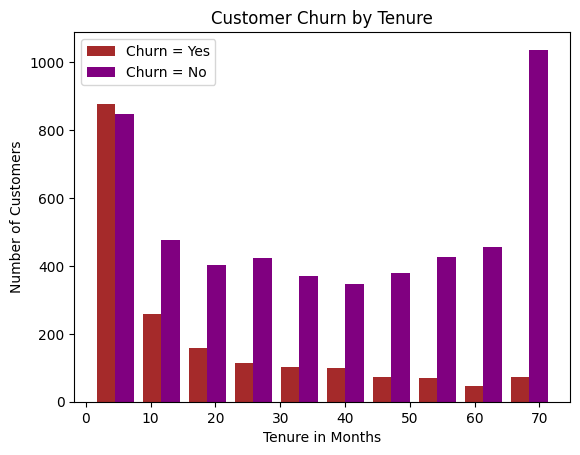

In [16]:
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure

plt.xlabel("Tenure in Months")
plt.ylabel("Number of Customers")
plt.title("Customer Churn by Tenure")
plt.hist([tenure_churn_yes,tenure_churn_no], color = ['brown','purple'], label = ['Churn = Yes', 'Churn = No' ])
plt.legend()

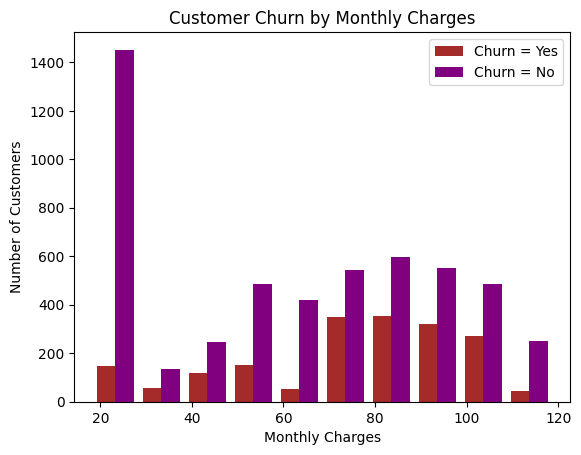

In [17]:
monthlycharges_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
monthlycharges_churn_no = df1[df1.Churn=='No'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn by Monthly Charges")
plt.hist([monthlycharges_churn_yes, monthlycharges_churn_no], color = ['brown','purple'], label = ['Churn = Yes', 'Churn = No' ])
plt.legend()


Label Encoding

In [19]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [20]:
for column in df:
    print(df[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [21]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [22]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [23]:
def print_unique_col_values (df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [24]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [25]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [26]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [27]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [28]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [29]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [30]:
df1['gender'].unique()

array([1, 0], dtype=int64)

**One Hot Encoding**

In [31]:
pd.get_dummies(data=df1, columns = ['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [32]:
df2 = pd.get_dummies(data=df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [34]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [35]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5593,0,0,1,0,0.422535,1,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
3492,1,0,0,0,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
193,1,0,1,1,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0


In [36]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [37]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [39]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

**Build the Artificial Neural Network AND Handle the imbalanced dataset**

**Method 1: Undersampling**
<br>
reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

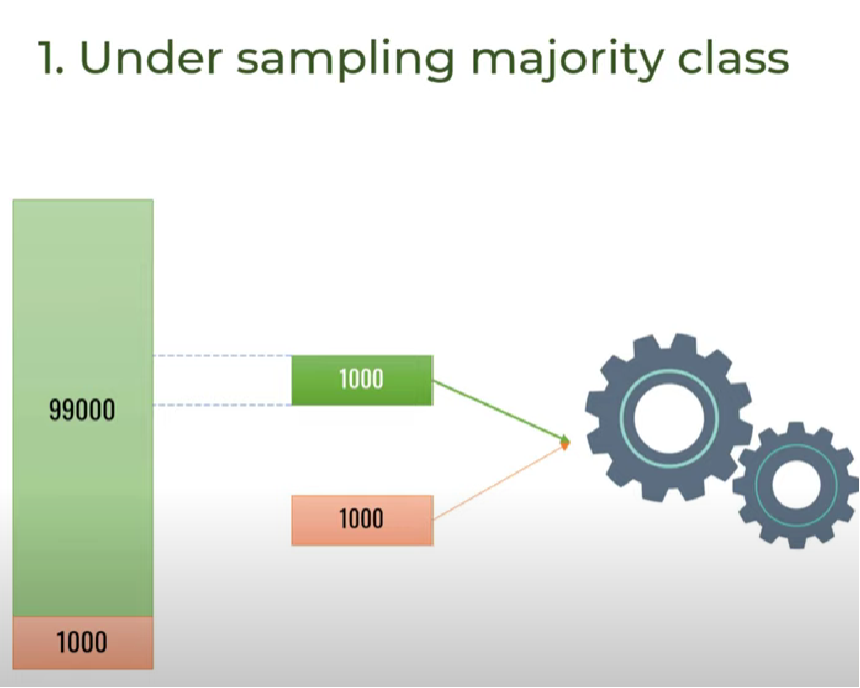

In [41]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [42]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [44]:
df_class_0.shape

(5163, 27)

In [45]:
df_class_1.shape

(1869, 27)

In [50]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [51]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [52]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [55]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
    keras.layers.Dense(26, input_shape =(26,), activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
    ])
    model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds
    

In [56]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 689us/step - loss: 0.5813 - accuracy: 0.7020
Epoch 2/100
94/94 [==============================] - 0s 603us/step - loss: 0.4995 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 605us/step - loss: 0.4868 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 0s 657us/step - loss: 0.4831 - accuracy: 0.7632
Epoch 5/100
94/94 [==============================] - 0s 689us/step - loss: 0.4778 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 706us/step - loss: 0.4739 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 0s 721us/step - loss: 0.4726 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 714us/step - loss: 0.4706 - accuracy: 0.7676
Epoch 9/100
94/94 [==============================] - 0s 715us/step - loss: 0.4661 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 719us/step - loss: 0.4648 - accura

**Method 2: Oversampling**

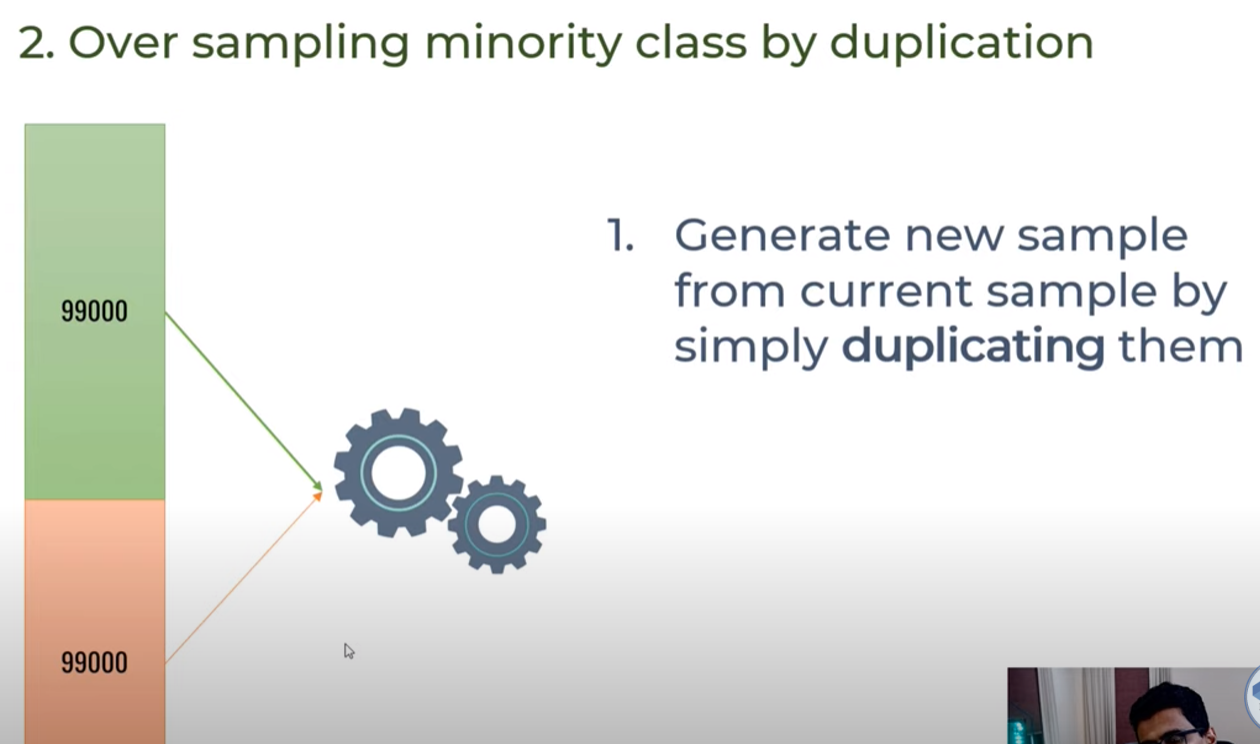

In [57]:
count_class_0, count_class_1

(5163, 1869)

In [58]:
df_class_1.sample(2000, replace=True).shape

(2000, 27)

In [60]:
# Oversample 1-class 
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [61]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [62]:
df_test_over.shape

(10326, 27)

In [63]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [65]:
# Check for uniformity in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [66]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 639us/step - loss: 0.5484 - accuracy: 0.7249
Epoch 2/100
259/259 [==============================] - 0s 645us/step - loss: 0.4899 - accuracy: 0.7569
Epoch 3/100
259/259 [==============================] - 0s 646us/step - loss: 0.4830 - accuracy: 0.7639
Epoch 4/100
259/259 [==============================] - 0s 641us/step - loss: 0.4797 - accuracy: 0.7694
Epoch 5/100
259/259 [==============================] - 0s 632us/step - loss: 0.4752 - accuracy: 0.7680
Epoch 6/100
259/259 [==============================] - 0s 628us/step - loss: 0.4717 - accuracy: 0.7711
Epoch 7/100
259/259 [==============================] - 0s 632us/step - loss: 0.4692 - accuracy: 0.7776
Epoch 8/100
259/259 [==============================] - 0s 603us/step - loss: 0.4667 - accuracy: 0.7738
Epoch 9/100
259/259 [==============================] - 0s 620us/step - loss: 0.4635 - accuracy: 0.7780
Epoch 10/100
259/259 [==============================] - 0s 640us/step - l

When compared, the oversampling has a better acccuracy, precision and recall for the class 1
<br>
Oversampling is better than undersampling

**Method 3: SMOTE**

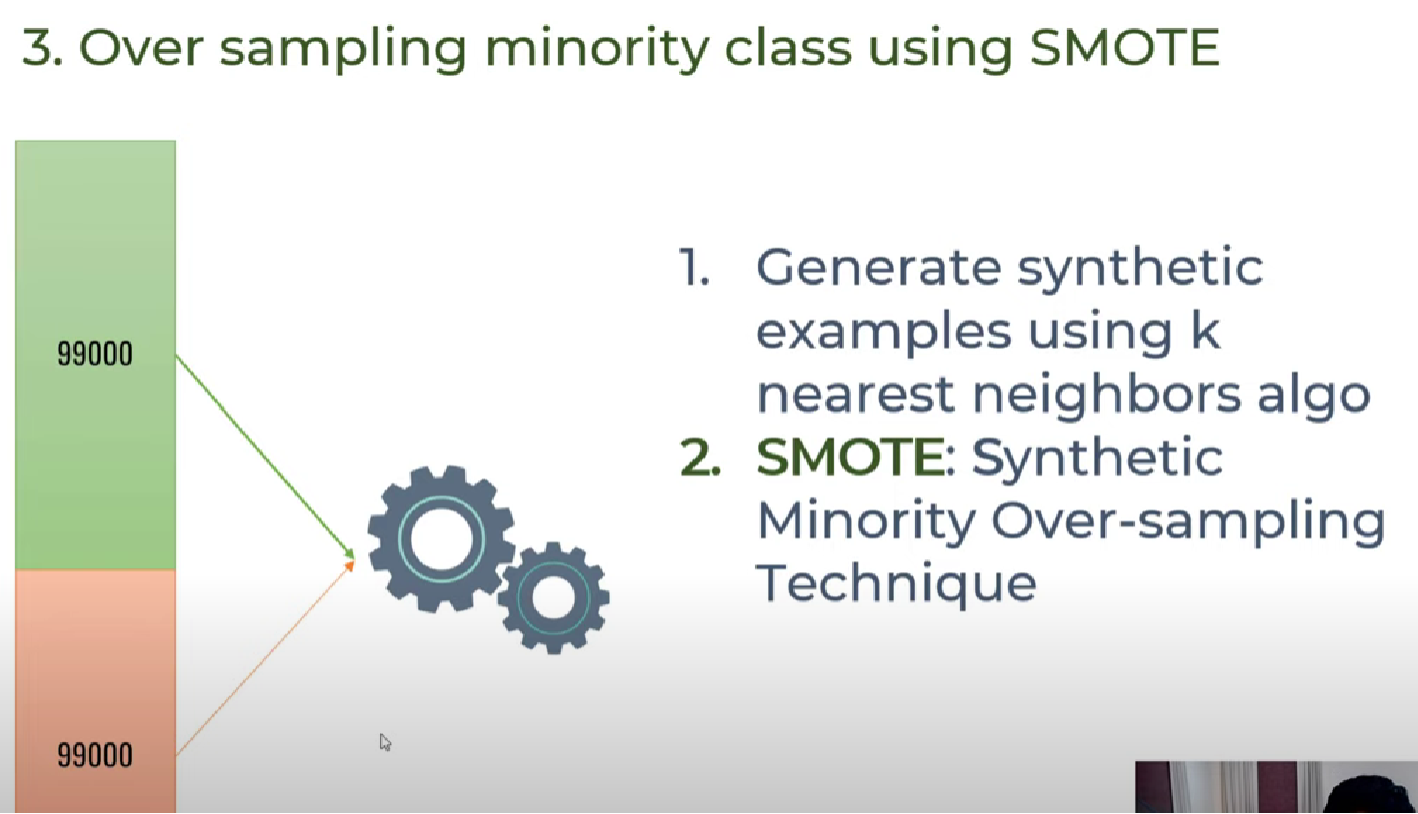

In [67]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [72]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [73]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 657us/step - loss: 0.5202 - accuracy: 0.7511
Epoch 2/100
259/259 [==============================] - 0s 669us/step - loss: 0.4660 - accuracy: 0.7817
Epoch 3/100
259/259 [==============================] - 0s 636us/step - loss: 0.4572 - accuracy: 0.7844
Epoch 4/100
259/259 [==============================] - 0s 656us/step - loss: 0.4512 - accuracy: 0.7902
Epoch 5/100
259/259 [==============================] - 0s 631us/step - loss: 0.4454 - accuracy: 0.7941
Epoch 6/100
259/259 [==============================] - 0s 636us/step - loss: 0.4407 - accuracy: 0.7925
Epoch 7/100
259/259 [==============================] - 0s 617us/step - loss: 0.4375 - accuracy: 0.7958
Epoch 8/100
259/259 [==============================] - 0s 646us/step - loss: 0.4307 - accuracy: 0.8001
Epoch 9/100
259/259 [==============================] - 0s 624us/step - loss: 0.4259 - accuracy: 0.8034
Epoch 10/100
259/259 [==============================] - 0s 632us/step - l

The accuracy is higher than the under sampling and over sampling

**Method 4: Use of Ensemble with undersampling**

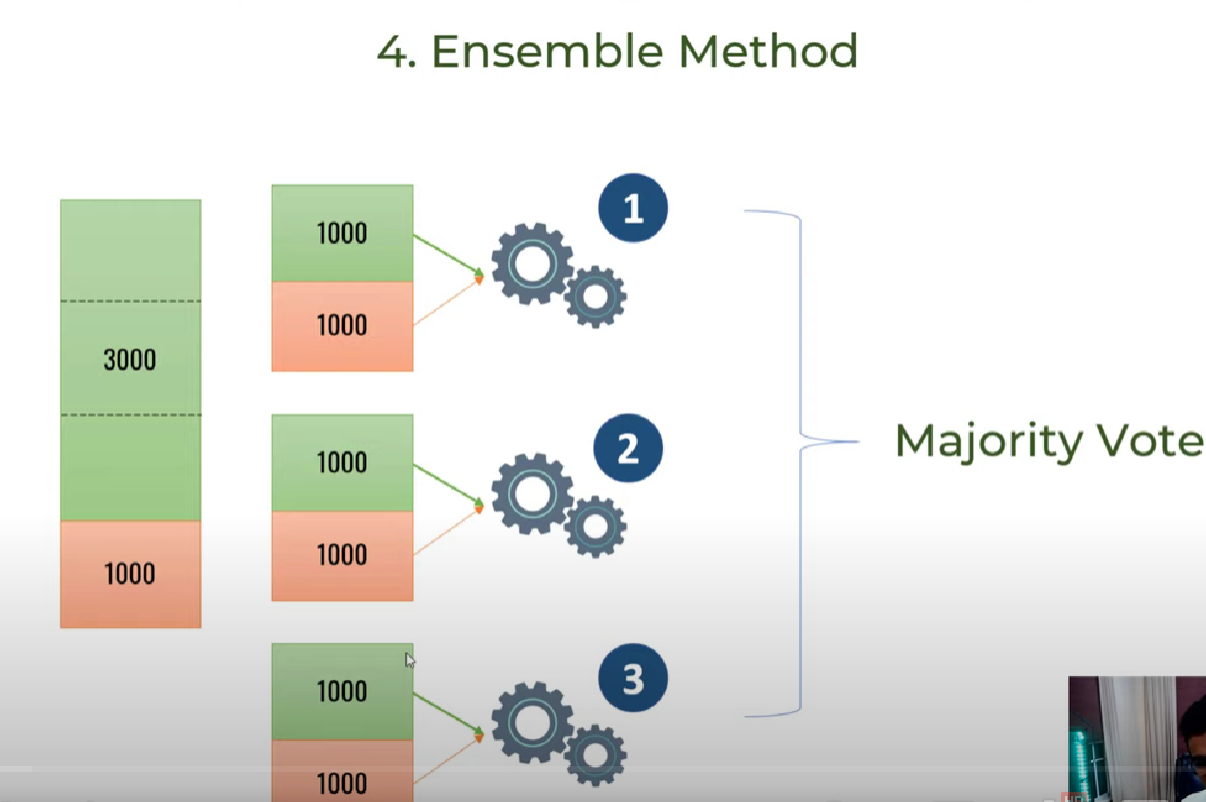

In [74]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [75]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [77]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model 1 --> class1(1495) + class0(0, 1495)
<br>
model 2 --> class1(1495) + class0(1496, 2990)
<br>
model 3 --> class1(1495) + class0(2991, 4130)0)4130)130)

In [78]:
df3 = X_train.copy()
df3['Churn'] = y_train
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [81]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [82]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [83]:
# Let's use batches the size of class 1 - 1495 rows, 
# We can randomly sample or use the chronological order, in this case we'll use the latter
df3_class0[:1495].shape

(1495, 27)

In [85]:
df3_train = pd.concat([df3_class0[:1495],df3_class1], axis = 'rows') #0 is rows, 1 is columns
df3_train.shape

(2990, 27)

In [86]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [87]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 691us/step - loss: 0.6160 - accuracy: 0.6833
Epoch 2/100
94/94 [==============================] - 0s 614us/step - loss: 0.5132 - accuracy: 0.7545
Epoch 3/100
94/94 [==============================] - 0s 700us/step - loss: 0.4964 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 697us/step - loss: 0.4884 - accuracy: 0.7702
Epoch 5/100
94/94 [==============================] - 0s 705us/step - loss: 0.4832 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 0s 694us/step - loss: 0.4813 - accuracy: 0.7753
Epoch 7/100
94/94 [==============================] - 0s 698us/step - loss: 0.4785 - accuracy: 0.7766
Epoch 8/100
94/94 [==============================] - 0s 697us/step - loss: 0.4766 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 695us/step - loss: 0.4752 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 706us/step - loss: 0.4716 - accura

In [88]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 530us/step - loss: 0.6229 - accuracy: 0.6726
Epoch 2/100
94/94 [==============================] - 0s 779us/step - loss: 0.5192 - accuracy: 0.7518
Epoch 3/100
94/94 [==============================] - 0s 628us/step - loss: 0.4978 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 707us/step - loss: 0.4902 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 712us/step - loss: 0.4854 - accuracy: 0.7652
Epoch 6/100
94/94 [==============================] - 0s 716us/step - loss: 0.4826 - accuracy: 0.7679
Epoch 7/100
94/94 [==============================] - 0s 719us/step - loss: 0.4784 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 703us/step - loss: 0.4755 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 716us/step - loss: 0.4736 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 702us/step - loss: 0.4729 - accura

In [89]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 560us/step - loss: 0.6434 - accuracy: 0.6175
Epoch 2/100
83/83 [==============================] - 0s 598us/step - loss: 0.5276 - accuracy: 0.7662
Epoch 3/100
83/83 [==============================] - 0s 610us/step - loss: 0.4962 - accuracy: 0.7708
Epoch 4/100
83/83 [==============================] - 0s 632us/step - loss: 0.4810 - accuracy: 0.7757
Epoch 5/100
83/83 [==============================] - 0s 584us/step - loss: 0.4769 - accuracy: 0.7769
Epoch 6/100
83/83 [==============================] - 0s 821us/step - loss: 0.4729 - accuracy: 0.7769
Epoch 7/100
83/83 [==============================] - 0s 562us/step - loss: 0.4699 - accuracy: 0.7810
Epoch 8/100
83/83 [==============================] - 0s 592us/step - loss: 0.4657 - accuracy: 0.7803
Epoch 9/100
83/83 [==============================] - 0s 663us/step - loss: 0.4650 - accuracy: 0.7860
Epoch 10/100
83/83 [==============================] - 0s 664us/step - loss: 0.4614 - accura

In [90]:
len(y_pred1)

1407

In [91]:
len(y_pred2)

1407

In [92]:
len(y_pred3)

1407

In [93]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [94]:
cl_report = classification_report(y_test, y_pred_final)
print(cl_report)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.76      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.72      0.74      1407



**In conclusion, the method with the highest accuracy AND f1-score for class 1 is SMOTE**